# Feature Enhancement

### Adding Crime | Population | morgate rate

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '%.3f' % x) #removes scientific notation

In [7]:
prop_2016 = pd.read_csv("properties_2016.csv", low_memory=False)

In [8]:
train_2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

In [9]:
df_2016 = train_2016.merge(prop_2016, how='left', on='parcelid')

In [10]:
la_zips = pd.read_csv("Zip Codes by County - zip_county df format.csv")

In [11]:
la_crime = pd.read_csv("Crime by County - crime_by_county.csv")

In [12]:
la_pop = pd.read_csv("LA County Pops DF - Sheet1.csv")

### File tests

In [13]:
prop_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34144442.000,-118654084.000,85768.000,nan,nan,nan,nan,nan,010D,269.000,NaN,60378002.041,37688.000,3101.000,nan,96337.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,9.000,2015.000,9.000,nan,NaN,nan,nan
1,10759547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34140430.000,-118625364.000,4083.000,nan,nan,nan,nan,nan,0109,261.000,LCA11*,60378001.011,37688.000,3101.000,nan,96337.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,27516.000,2015.000,27516.000,nan,NaN,nan,nan
2,10843547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,73026.000,nan,nan,73026.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,33989359.000,-118394633.000,63085.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60377030.012,51617.000,3101.000,nan,96095.000,0.000,nan,nan,nan,2.000,nan,nan,nan,nan,NaN,650756.000,1413387.000,2015.000,762631.000,20800.370,NaN,nan,nan
3,10859147,nan,nan,nan,0.000,0.000,3.000,7.000,nan,nan,nan,5068.000,nan,nan,5068.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34148863.000,-118437206.000,7521.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60371412.023,12447.000,3101.000,27080.000,96424.000,0.000,nan,nan,nan,nan,nan,nan,1948.000,1.000,NaN,571346.000,1156834.000,2015.000,585488.000,14557.570,NaN,nan,nan
4,10879947,nan,nan,nan,0.000,0.000,4.000,nan,nan,nan,nan,1776.000,nan,nan,1776.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34194168.000,-118385816.000,8512.000,nan,nan,nan,nan,nan,1210,31.000,LAM1,60371232.052,12447.000,3101.000,46795.000,96450.000,0.000,nan,nan,nan,1.000,nan,nan,1947.000,nan,NaN,193796.000,433491.000,2015.000,239695.000,5725.170,NaN,nan,nan


In [14]:
prop_2016.shape

(2985217, 58)

In [15]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.028,2016-01-01
1,14366692,-0.168,2016-01-01
2,12098116,-0.004,2016-01-01
3,12643413,0.022,2016-01-02
4,14432541,-0.005,2016-01-02


In [16]:
train_2016.shape

(90275, 3)

In [17]:
la_zips.head()

,Zip,County
0,90895,Los Angeles County
1,91001,Los Angeles County
2,91006,Los Angeles County
3,91007,Los Angeles County
4,91011,Los Angeles County


In [18]:
la_zips.shape

(445, 2)

In [19]:
la_crime.head()

,County,Crime Type,Crime Amount,Year
0,Orange County,Violent,7275,2016
1,Orange County,Violent,7627,2017
2,Orange County,Motor Vehicle Theft,8522,2016
3,Orange County,Motor Vehicle Theft,8835,2017
4,Orange County,Larceny-Theft,46507,2016


In [20]:
la_crime.shape

(24, 4)

In [21]:
la_pop.head()

,Year,County,Population
0,2016,Orange County,3177703
1,2017,Orange County,3190400
2,2016,Los Angeles County,10150558
3,2017,Los Angeles County,10163507
4,2016,Ventura County,851096


In [22]:
la_pop.shape

(6, 3)

In [23]:
la_crime_rates = pd.merge(la_crime,la_pop, how="left", on=['County','Year'])

In [24]:
la_crime_rates.head()

,County,Crime Type,Crime Amount,Year,Population
0,Orange County,Violent,7275,2016,3177703
1,Orange County,Violent,7627,2017,3190400
2,Orange County,Motor Vehicle Theft,8522,2016,3177703
3,Orange County,Motor Vehicle Theft,8835,2017,3190400
4,Orange County,Larceny-Theft,46507,2016,3177703


In [25]:
la_crime_rates.dtypes

County          object
Crime Type      object
Crime Amount     int64
Year             int64
Population       int64
dtype: object

In [26]:
#la_crime_rates['Crime Amount'] = la_crime_rates['Crime Amount'].astype('int64') #errored out
#la_crime_rates[["Crime Amount", "Population"]] = la_crime_rates[["Crime Amount", "Population"]].apply(pd.to_numeric) #errored out

In [27]:
la_crime_rates['Crime_Rate'] = la_crime_rates['Crime Amount'] / la_crime_rates['Population']

In [28]:
la_crime_rates.head()

,County,Crime Type,Crime Amount,Year,Population,Crime_Rate
0,Orange County,Violent,7275,2016,3177703,0.002
1,Orange County,Violent,7627,2017,3190400,0.002
2,Orange County,Motor Vehicle Theft,8522,2016,3177703,0.003
3,Orange County,Motor Vehicle Theft,8835,2017,3190400,0.003
4,Orange County,Larceny-Theft,46507,2016,3177703,0.015


In [29]:
la_crime_rates_2016 = la_crime_rates[la_crime_rates['Year'] == 2016]

In [30]:
la_crime_rates_2016.head()

,County,Crime Type,Crime Amount,Year,Population,Crime_Rate
0,Orange County,Violent,7275,2016,3177703,0.002
2,Orange County,Motor Vehicle Theft,8522,2016,3177703,0.003
4,Orange County,Larceny-Theft,46507,2016,3177703,0.015
6,Orange County,Burglary,11025,2016,3177703,0.003
8,Los Angeles County,Violent,56351,2016,10150558,0.006


In [31]:
la_crime_rates_2017 = la_crime_rates[la_crime_rates['Year'] == 2017]

In [32]:
la_crime_rates_2017.head()

,County,Crime Type,Crime Amount,Year,Population,Crime_Rate
1,Orange County,Violent,7627,2017,3190400,0.002
3,Orange County,Motor Vehicle Theft,8835,2017,3190400,0.003
5,Orange County,Larceny-Theft,46607,2017,3190400,0.015
7,Orange County,Burglary,10196,2017,3190400,0.003
9,Los Angeles County,Violent,59924,2017,10163507,0.006


In [33]:
df_2016.head(10)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.028,2016-01-01,1.000,nan,nan,2.000,3.000,nan,4.000,2.000,nan,nan,1684.000,1684.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,34280990.000,-118488536.000,7528.000,nan,nan,nan,nan,nan,0100,261.000,LARS,60371066.461,12447.000,3101.000,31817.000,96370.000,0.000,nan,nan,nan,1.000,nan,nan,1959.000,nan,NaN,122754.000,360170.000,2015.000,237416.000,6735.880,NaN,nan,60371066461001.000
1,14366692,-0.168,2016-01-01,nan,nan,nan,3.500,4.000,nan,nan,3.500,nan,nan,2263.000,2263.000,nan,nan,nan,nan,6059.000,nan,3.000,2.000,468.000,NaN,nan,33668120.000,-117677556.000,3643.000,nan,nan,nan,nan,nan,1,261.000,NaN,60590524.222,32380.000,1286.000,nan,96962.000,0.000,nan,1.000,nan,nan,nan,nan,2014.000,nan,NaN,346458.000,585529.000,2015.000,239071.000,10153.020,NaN,nan,nan
2,12098116,-0.004,2016-01-01,1.000,nan,nan,3.000,2.000,nan,4.000,3.000,nan,nan,2217.000,2217.000,nan,nan,nan,nan,6037.000,nan,3.000,nan,nan,NaN,2.000,34136312.000,-118175032.000,11423.000,nan,nan,nan,nan,nan,0100,261.000,PSR6,60374638.003,47019.000,3101.000,275411.000,96293.000,0.000,nan,nan,nan,1.000,nan,nan,1940.000,nan,NaN,61994.000,119906.000,2015.000,57912.000,11484.480,NaN,nan,60374638003004.000
3,12643413,0.022,2016-01-02,1.000,nan,nan,2.000,2.000,nan,4.000,2.000,nan,nan,839.000,839.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,33755800.000,-118309000.000,70859.000,nan,nan,nan,nan,nan,010C,266.000,LAR3,60372963.002,12447.000,3101.000,54300.000,96222.000,0.000,nan,nan,nan,1.000,nan,nan,1987.000,nan,NaN,171518.000,244880.000,2015.000,73362.000,3048.740,NaN,nan,60372963002002.000
4,14432541,-0.005,2016-01-02,nan,nan,nan,2.500,4.000,nan,nan,2.500,nan,nan,2283.000,2283.000,nan,nan,nan,nan,6059.000,nan,2.000,2.000,598.000,NaN,nan,33485643.000,-117700234.000,6000.000,1.000,nan,nan,nan,1.000,122,261.000,NaN,60590423.381,17686.000,1286.000,nan,96961.000,8.000,nan,1.000,nan,nan,nan,nan,1981.000,2.000,NaN,169574.000,434551.000,2015.000,264977.000,5488.960,NaN,nan,60590423381006.000
5,11509835,-0.271,2016-01-02,1.000,nan,nan,4.000,4.000,nan,1.000,4.000,nan,nan,3067.000,3067.000,nan,nan,nan,nan,6037.000,nan,4.000,nan,nan,NaN,2.000,33870089.000,-118402768.000,2708.000,nan,nan,nan,nan,nan,0100,261.000,HBR3YY,60376210.044,29712.000,3101.000,nan,96109.000,0.000,nan,nan,nan,1.000,nan,nan,1982.000,nan,NaN,880650.000,2447951.000,2015.000,1567301.000,27126.570,NaN,nan,60376210044006.000
6,12286022,0.044,2016-01-02,nan,nan,nan,1.000,2.000,nan,7.000,1.000,nan,nan,1297.000,1297.000,nan,nan,nan,nan,6037.000,nan,1.000,nan,nan,NaN,7.000,33899475.000,-118212720.000,6677.000,nan,nan,nan,nan,nan,0100,261.000,CORH*,60375416.053,24174.000,3101.000,nan,96091.000,0.000,nan,nan,nan,1.000,nan,nan,1939.000,nan,NaN,64549.000,111521.000,2015.000,46972.000,2304.970,NaN,nan,60375416053007.000
7,17177301,0.164,2016-01-02,nan,nan,nan,2.500,3.000,nan,nan,2.500,nan,853.000,1763.000,1763.000,nan,nan,853.000,nan,6111.000,1.000,2.000,2.000,0.000,NaN,nan,34207204.000,-119165589.000,nan,nan,nan,nan,nan,nan,1129,266.000,NaN

In [34]:
prop_2016 = prop_2016.rename(columns={'regionidzip': 'Zip'})
z = prop_2016['Zip'].isnull().sum()
print(z)


13980


In [35]:
prop_2016.dropna(subset=['Zip'],inplace = True)
prop_2016.shape

(2971237, 58)

In [36]:
prop_2016['Zip'] = prop_2016['Zip'].astype('int64') #errored out need to drop zip NAs 

In [37]:
prop_2016 = pd.merge(prop_2016, la_zips, how="left",on='Zip')

In [38]:
prop_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,Zip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,County
0,10754147,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34144442.000,-118654084.000,85768.000,nan,nan,nan,nan,nan,010D,269.000,NaN,60378002.041,37688.000,3101.000,nan,96337,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,9.000,2015.000,9.000,nan,NaN,nan,nan,NaN
1,10759547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34140430.000,-118625364.000,4083.000,nan,nan,nan,nan,nan,0109,261.000,LCA11*,60378001.011,37688.000,3101.000,nan,96337,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,27516.000,2015.000,27516.000,nan,NaN,nan,nan,NaN
2,10843547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,73026.000,nan,nan,73026.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,33989359.000,-118394633.000,63085.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60377030.012,51617.000,3101.000,nan,96095,0.000,nan,nan,nan,2.000,nan,nan,nan,nan,NaN,650756.000,1413387.000,2015.000,762631.000,20800.370,NaN,nan,nan,NaN
3,10859147,nan,nan,nan,0.000,0.000,3.000,7.000,nan,nan,nan,5068.000,nan,nan,5068.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34148863.000,-118437206.000,7521.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60371412.023,12447.000,3101.000,27080.000,96424,0.000,nan,nan,nan,nan,nan,nan,1948.000,1.000,NaN,571346.000,1156834.000,2015.000,585488.000,14557.570,NaN,nan,nan,NaN
4,10879947,nan,nan,nan,0.000,0.000,4.000,nan,nan,nan,nan,1776.000,nan,nan,1776.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34194168.000,-118385816.000,8512.000,nan,nan,nan,nan,nan,1210,31.000,LAM1,60371232.052,12447.000,3101.000,46795.000,96450,0.000,nan,nan,nan,1.000,nan,nan,1947.000,nan,NaN,193796.000,433491.000,2015.000,239695.000,5725.170,NaN,nan,nan,NaN


In [39]:
z = prop_2016['County'].isnull().sum()
z

2971237

In [40]:
la_zips.dtypes

Zip        int64
County    object
dtype: object

In [41]:
zips = pd.read_csv("zips.csv")

In [42]:
zips.tail()

,zip,latitude,longitude
33139,99923,56.002,-130.041
33140,99925,55.550,-132.946
33141,99926,55.138,-131.470
33142,99927,56.239,-133.458
33143,99929,56.371,-131.693


In [43]:
df_2016 = pd.merge(df_2016, zips, how="left",on=['latitude','longitude'])

In [44]:
df_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,zip
0,11016594,0.028,2016-01-01,1.000,nan,nan,2.000,3.000,nan,4.000,2.000,nan,nan,1684.000,1684.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,34280990.000,-118488536.000,7528.000,nan,nan,nan,nan,nan,0100,261.000,LARS,60371066.461,12447.000,3101.000,31817.000,96370.000,0.000,nan,nan,nan,1.000,nan,nan,1959.000,nan,NaN,122754.000,360170.000,2015.000,237416.000,6735.880,NaN,nan,60371066461001.000,nan
1,14366692,-0.168,2016-01-01,nan,nan,nan,3.500,4.000,nan,nan,3.500,nan,nan,2263.000,2263.000,nan,nan,nan,nan,6059.000,nan,3.000,2.000,468.000,NaN,nan,33668120.000,-117677556.000,3643.000,nan,nan,nan,nan,nan,1,261.000,NaN,60590524.222,32380.000,1286.000,nan,96962.000,0.000,nan,1.000,nan,nan,nan,nan,2014.000,nan,NaN,346458.000,585529.000,2015.000,239071.000,10153.020,NaN,nan,nan,nan
2,12098116,-0.004,2016-01-01,1.000,nan,nan,3.000,2.000,nan,4.000,3.000,nan,nan,2217.000,2217.000,nan,nan,nan,nan,6037.000,nan,3.000,nan,nan,NaN,2.000,34136312.000,-118175032.000,11423.000,nan,nan,nan,nan,nan,0100,261.000,PSR6,60374638.003,47019.000,3101.000,275411.000,96293.000,0.000,nan,nan,nan,1.000,nan,nan,1940.000,nan,NaN,61994.000,119906.000,2015.000,57912.000,11484.480,NaN,nan,60374638003004.000,nan
3,12643413,0.022,2016-01-02,1.000,nan,nan,2.000,2.000,nan,4.000,2.000,nan,nan,839.000,839.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,33755800.000,-118309000.000,70859.000,nan,nan,nan,nan,nan,010C,266.000,LAR3,60372963.002,12447.000,3101.000,54300.000,96222.000,0.000,nan,nan,nan,1.000,nan,nan,1987.000,nan,NaN,171518.000,244880.000,2015.000,73362.000,3048.740,NaN,nan,60372963002002.000,nan
4,14432541,-0.005,2016-01-02,nan,nan,nan,2.500,4.000,nan,nan,2.500,nan,nan,2283.000,2283.000,nan,nan,nan,nan,6059.000,nan,2.000,2.000,598.000,NaN,nan,33485643.000,-117700234.000,6000.000,1.000,nan,nan,nan,1.000,122,261.000,NaN,60590423.381,17686.000,1286.000,nan,96961.000,8.000,nan,1.000,nan,nan,nan,nan,1981.000,2.000,NaN,169574.000,434551.000,2015.000,264977.000,5488.960,NaN,nan,60590423381006.000,nan


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

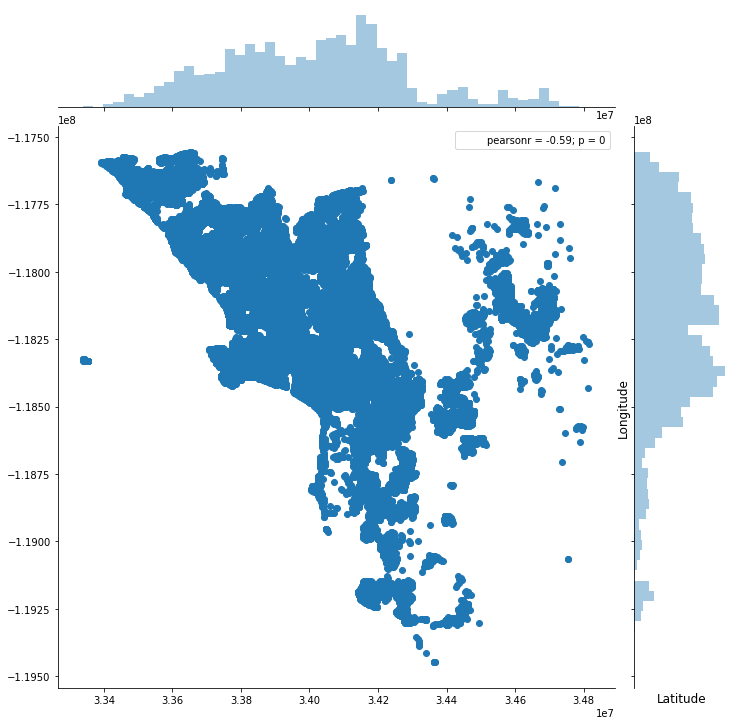

In [45]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_2016.latitude.values, y=df_2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

<Figure size 864x864 with 0 Axes>

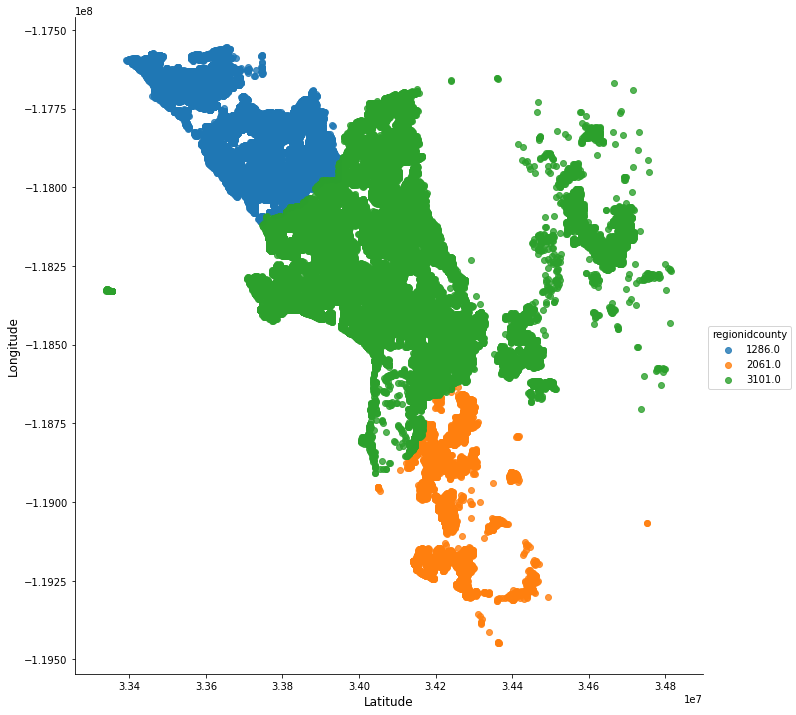

In [55]:
plt.figure(figsize=(12,12))
#sns.jointplot(x=df_2016.latitude.values, y=df_2016.longitude.values, size=10)
sns.lmplot(x='latitude', y='longitude', hue= 'regionidcounty', fit_reg=False, data=df_2016, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
## 3101 == LA County
## 2061 == Orange County
## 1286 == Ventura

AttributeError: module 'seaborn' has no attribute 'scatter'

<Figure size 864x864 with 0 Axes>

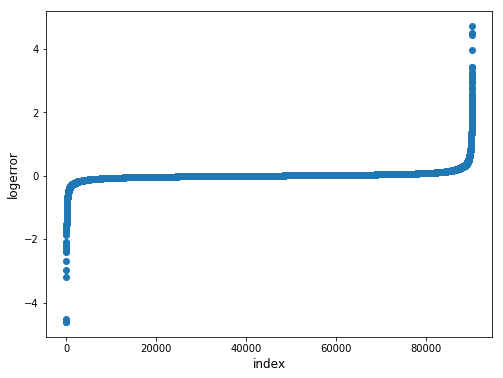

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_2016.shape[0]), np.sort(df_2016.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [59]:
ulimit = np.percentile(df_2016.logerror.values, 99)
llimit = np.percentile(df_2016.logerror.values, 1)
df_2016['logerror'].ix[df_2016['logerror']>ulimit] = ulimit
df_2016['logerror'].ix[df_2016['logerror']<llimit] = llimit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


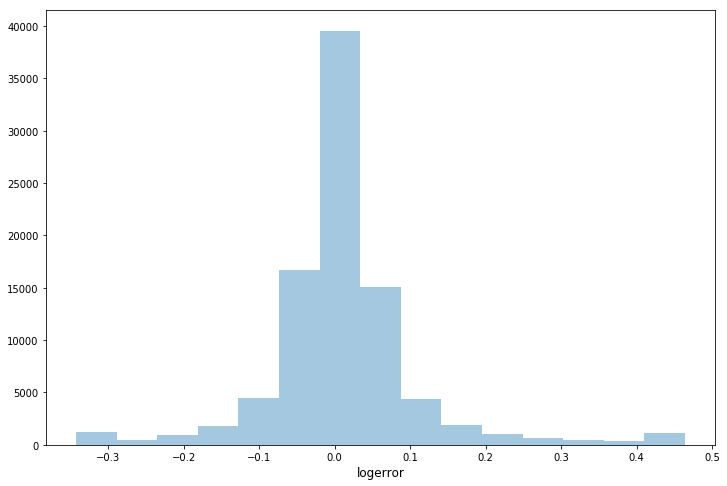

In [60]:
plt.figure(figsize=(12,8))
sns.distplot(df_2016.logerror.values, bins=15, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()